<a href="https://colab.research.google.com/github/bahador1/I-GOS/blob/main/dp_IGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### understanding plt dpi figsize

- `torch.Size([1, 3, 434, 500])`  

In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

# --- Parameters ---
image_path = "ILSVRC2012_val_00001003.JPEG"      # replace with your file
scale = 3                     # upsample factor (e.g. 3x)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load image and convert to tensor (C,H,W), range [0,1] ---
img_pil = Image.open(image_path).convert("RGB")
to_tensor = T.ToTensor()

In [ ]:

img = to_tensor(img_pil).unsqueeze(0).to(device)   # shape: (1, C, H, W)


In [ ]:

_, _, H, W = img.shape
new_size = (H * scale, W * scale)   # size expects (H, W)

# --- Upsample with bilinear (align_corners=False) ---
# ups_bilinear = F.interpolate(img, size=new_size, mode="bilinear", align_corners=False)
# upsample = torch.nn.UpsamplingBilinear2d(size=resize_wh)

# --- For comparison: nearest neighbor and bilinear with align_corners=True ---
# ups_nearest = F.interpolate(img, size=new_size, mode="nearest")
ups_bilinear_align_true = F.interpolate(img, size=new_size, mode="bilinear", align_corners=True)

# --- Convert tensors to numpy images for plotting ---
def to_np(tensor):
    tensor = tensor.squeeze(0).detach().cpu()           # (C,H,W)
    tensor = torch.clamp(tensor, 0.0, 1.0)
    np_img = tensor.permute(1, 2, 0).numpy()            # (H,W,C)
    return np_img

# torch to np for plotting
orig_np = to_np(img)
# bilinear_np = to_np(ups_bilinear)
# nearest_np = to_np(ups_nearest)
bilinear_true_np = to_np(ups_bilinear_align_true)


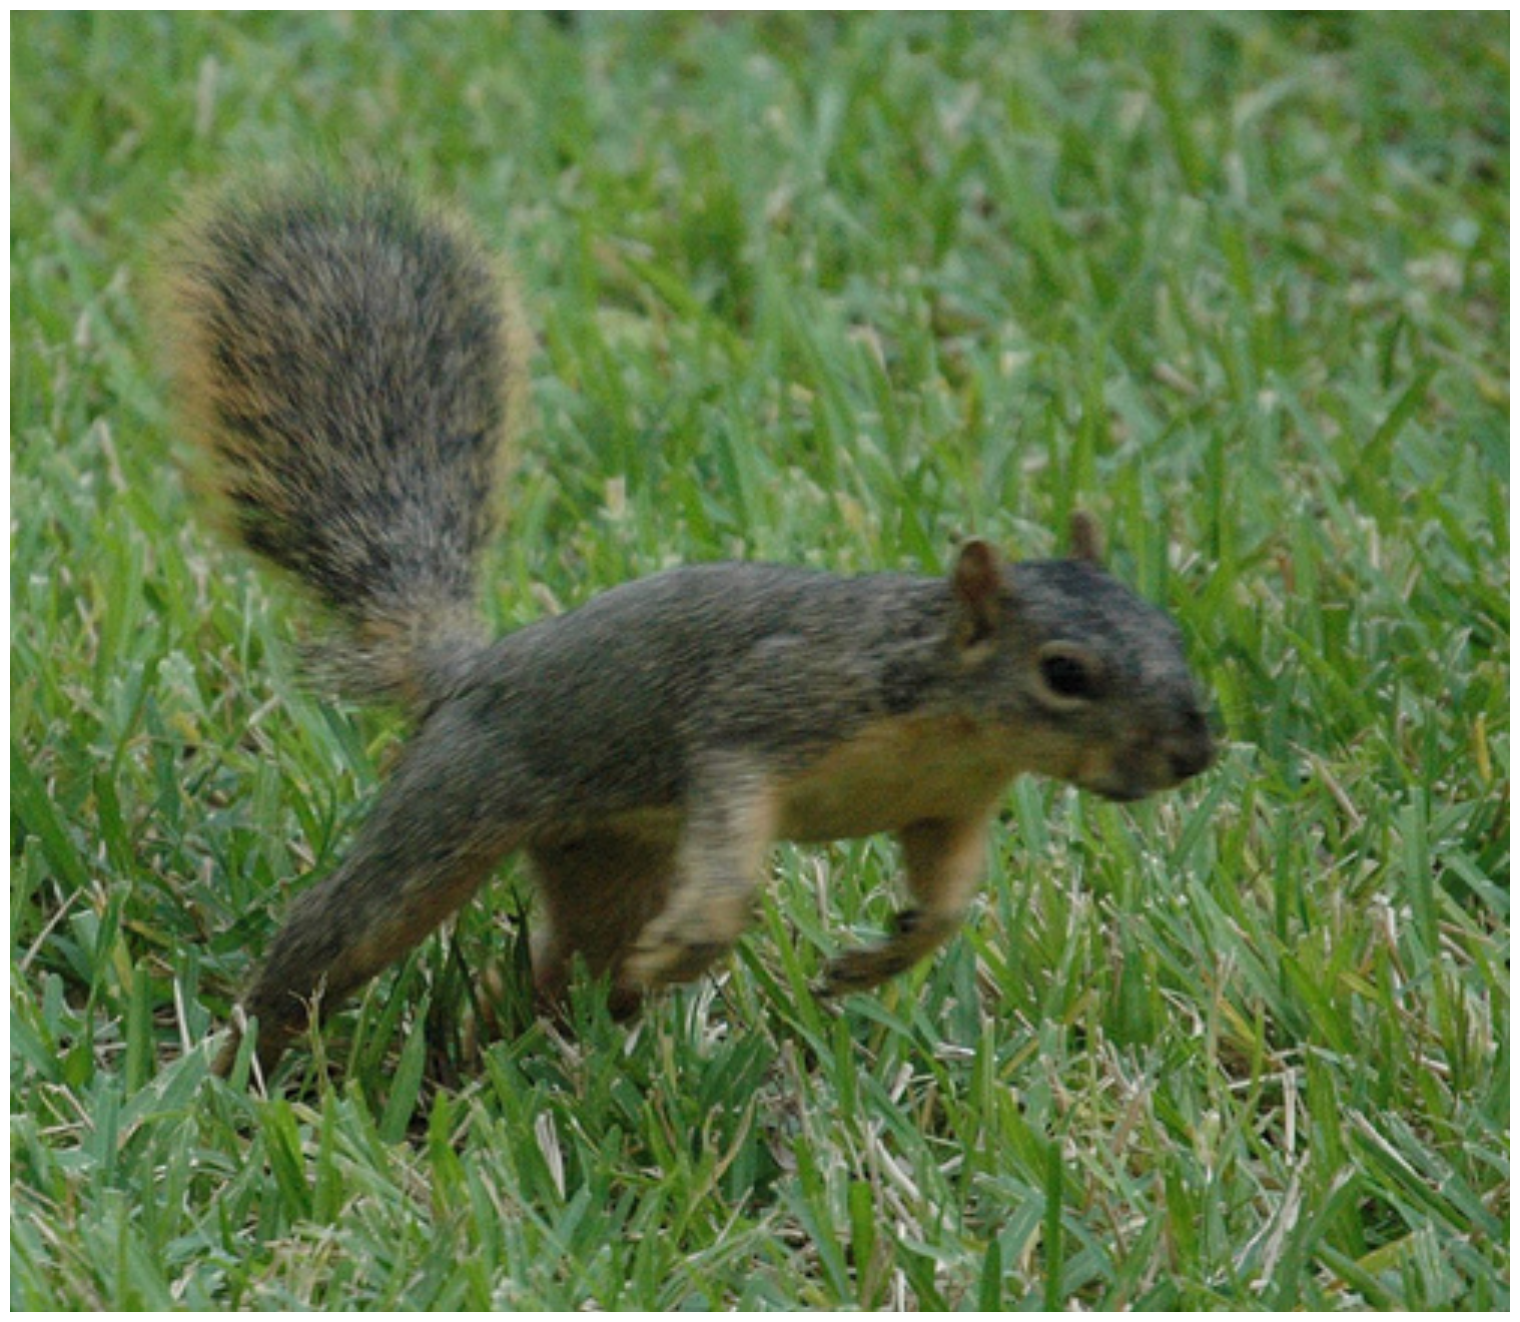

In [ ]:
# Get image dimensions (height, width)
height, width  = new_size

# Set DPI (adjust if needed for your display; common values are 72-100)
dpi = 100

# Create figure with size in inches (pixels / DPI)
fig = plt.figure(figsize=(width / dpi, height / dpi))

# Add axes that fill the figure (no padding)
ax = fig.add_axes([0, 0, 1, 1])

# Display the image
ax.imshow(  )

# Turn off axes
ax.axis('off')

# Show the plot
plt.show()

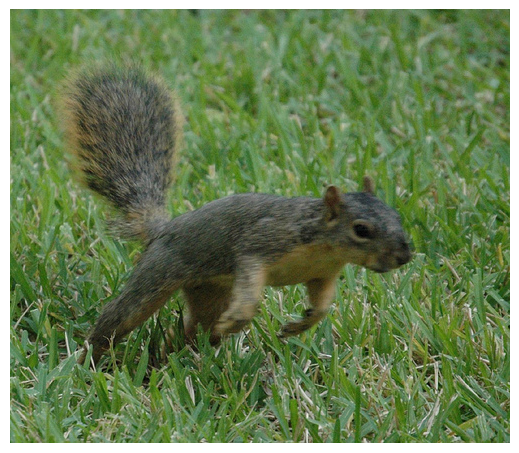

In [ ]:
# Create figure with size in inches (pixels / DPI)
fig = plt.figure(figsize=(W / dpi, H / dpi))

# Add axes that fill the figure (no padding)
ax = fig.add_axes([0, 0, 1, 1])

# Display the image
ax.imshow(orig_np)

# Turn off axes
ax.axis('off')

# Show the plot
plt.show()

### stochastic smoothing,

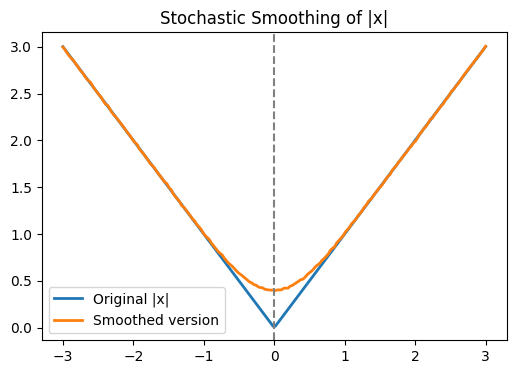

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Original function
def f(x):
    return np.abs(x)

# Smoothed function using Monte Carlo
def f_smooth(x, sigma=0.5, n_samples=10000):
    eps = np.random.normal(0, sigma, size=n_samples)
    return np.mean(np.abs(x + eps))

# Generate values
xs = np.linspace(-3, 3, 200)
f_vals = [f(x) for x in xs]
f_smooth_vals = [f_smooth(x) for x in xs]

# Plot
plt.figure(figsize=(6,4))
plt.plot(xs, f_vals, label="Original |x|", lw=2)
plt.plot(xs, f_smooth_vals, label="Smoothed version", lw=2)
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Stochastic Smoothing of |x|")
plt.show()


### tensor expansion

In [ ]:
import torch

x = torch.tensor([[1], [2], [3]])  # Shape: [3, 1]
expanded = x.expand(3, 4)  # Expands the second dimension from 1 to 4
# Result: tensor([[1, 1, 1, 1],
#                 [2, 2, 2, 2],
#                 [3, 3, 3, 3]])

In [ ]:
#what if you want to add channel to the tensor? meaning:
# tensor.shape [3,1] -> [3,3,1]

In [ ]:
x.expand(3,3,1)

tensor([[[1],
         [2],
         [3]],

        [[1],
         [2],
         [3]],

        [[1],
         [2],
         [3]]])

In [ ]:
from torchvision import models


def load_model_new(use_cuda = 0, model_name = 'resnet50'):

    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
    elif model_name == 'vgg19':
        model = models.vgg19(pretrained=True)

    #print(model)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.parameters():
        p.requires_grad = False

    return model

In [ ]:
model = load_model_new( model_name='vgg19')

In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
import torch
import torch.nn as nn

# Dummy model (e.g., simple classifier)
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(10, 3)  # Input size 10, 3 classes

    def forward(self, x):
        return self.fc(x)

model = SimpleModel()
img = torch.randn(2, 10)  # Batch of 2 random "images" (vectors here)

logits = model(img)  # Raw scores, e.g., tensor([[1.2, -0.5, 0.3], [0.1, 2.0, -1.0]])
print("Logits:", logits)

target = nn.Softmax(dim=1)(logits)  # Probabilities, e.g., [[0.55, 0.10, 0.35], [0.12, 0.82, 0.06]]
print("Softmax probs:", target)

Logits: tensor([[-0.3168, -0.1033,  0.4288],
        [ 0.0374,  0.8226, -0.2650]], grad_fn=<AddmmBackward0>)
Softmax probs: tensor([[0.2301, 0.2849, 0.4850],
        [0.2543, 0.5577, 0.1880]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model

SimpleModel(
  (fc): Linear(in_features=10, out_features=3, bias=True)
)

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image  # For loading an image file

# Load model (use weights for newer PyTorch; pretrained is deprecated)
model = models.vgg19(weights='IMAGENET1K_V1')  # Or pretrained=True for older versions
model.eval()  # Set to evaluation mode (no dropout, etc.)

# Preprocess a sample image (assuming 'image.jpg' is a file)
img = Image.open('ILSVRC2012_val_00001003.JPEG').convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img_tensor = preprocess(img).unsqueeze(0)  # Add batch dim: [1, 3, 224, 224]

# Run inference
output = model(img_tensor)  # Shape: [1, 1000]
probs = torch.nn.Softmax(dim=1)(output)  # Probabilities
pred_class = probs.argmax(dim=1).item()  # Predicted class index (0-999)

tensor([[[[-0.0458,  0.1426,  0.4166,  ..., -0.0458, -0.0458, -0.0972],
          [-0.0972,  0.0569,  0.3481,  ..., -0.1314, -0.1314, -0.2513],
          [-0.2342, -0.1143,  0.2624,  ..., -0.3369, -0.3027, -0.4054],
          ...,
          [-0.3712, -0.2684, -0.4739,  ..., -0.6109, -0.7650, -0.7822],
          [-0.7650, -0.1828, -0.0116,  ..., -0.7479, -0.7650, -0.7137],
          [-0.5424, -0.2342, -0.1143,  ..., -0.8507, -0.9020, -0.9705]],

         [[ 0.5553,  0.6604,  0.7304,  ...,  0.4328,  0.4503,  0.3978],
          [ 0.5028,  0.5728,  0.6429,  ...,  0.3102,  0.3627,  0.2927],
          [ 0.3978,  0.4328,  0.6078,  ...,  0.1527,  0.2402,  0.1877],
          ...,
          [ 0.3452,  0.3627,  0.1352,  ...,  0.1001,  0.0126,  0.0301],
          [-0.0924,  0.4328,  0.5903,  ...,  0.0651, -0.0224,  0.0126],
          [ 0.1001,  0.4678,  0.5553,  ..., -0.0049, -0.0749, -0.2325]],

         [[-0.1835,  0.1302,  0.4091,  ..., -0.1487, -0.0441, -0.0441],
          [-0.2707,  0.0431,  